In [1]:
import pygmt
import numpy as np
import pandas as pd

In [2]:
earthquakes = pd.read_csv('/Users/sydneydybing/StrainProject/2024/M6_catalog_2004-2024.csv', dtype = str)
bsm_mda = pd.read_csv('/Users/sydneydybing/StrainProject/2024/bsm_metadata.csv')

bsm_mda

,BNUM,NAME,LAT,LONG,ELEV(m),INSTALL_DATE,CH0(EofN),BSM_Depth(m),SEISMOMETER_Depth(m),PORE_DEPTH(m),DATA_START,->,DATA_END,GAP(m),L_DATE,L0(cnts),L1(cnts),L2(cnts),L3(cnts),REGION
0,AVN2,osageavn2bok2016,36.532120,-96.081020,261.0,9/10/16,230.5,96.0,NaN,NaN,2016:254,->,Present,0.0001,2016:306,56115944,55743838,53304262,53874519,Oklahoma
1,B001,golbeck01bwa2005,48.043070,-123.131410,237.0,6/29/05,200.2,152.9,144.4,20.6,2005:180,->,Present,0.0002,2005:194,50935230,50185604,50654939,51914278,PacificNorthWest
2,B003,floequarybwa2005,48.062360,-124.140860,284.7,6/21/05,250.7,169.8,159.7,50.3,2007:303,->,Present,0.0002,2005:186,48337769,54102554,48683869,48835069,PacificNorthWest
3,B004,hokofallsbwa2005,48.201930,-124.427010,30.0,6/15/05,168.2,166.1,156.1,3.4,2005:166,->,Present,0.0002,2005:180,48391551,49872537,49840454,49541470,PacificNorthWest
4,B005,shoresnw1bwa2005,48.059550,-123.503280,302.7,7/19/05,319.7,161.2,153,44.5,2005:203,->,Present,0.0002,2005:257,50378161,50000351,48306023,49183054,PacificNorthWest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,TSM2,tstartsm2bit2021,43.396190,12.489944,630.0,11/3/21,345.4,158.1,152.5,NaN,2021:307,->,Present,0.0001,2021:314,54578308,52933014,53995653,50732399,TabooStar
85,TSM3,tstartsm3bit2021,43.382980,12.354506,341.0,11/15/21,312.1,78.6,73,NaN,2021:319,->,Present,0.0001,2021:326,53675042,50931471,55603089,53766332,TabooStar
86,TSM4,tstartsm4bit2022,43.308700,12.304600,270.0,5/14/22,Unknown,99.3,95.1,NaN,2022:134,->,Present,0.0001,2022:141,51839210,53148452,50803509,50425102,TabooStar
87,TSM5,tstartsm5bit2022,43.479691,12.602520,379.0,5/27/22,342.9,116.0,111,NaN,2022:147,->,Present,0.0001,2022:154,50858593,53668101,53904388,49946112,TabooStar


In [3]:
dist_array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata.npy')

dist_array.shape

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance

(439, 9)

In [7]:
earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-13T15:54:53.808Z,49.215,-129.6178,7,6,mww,228,54,1.719,0.65,...,2023-06-17T21:36:51.040Z,NaN,earthquake,5.71,1.776,0.032,96,reviewed,us,us
1,2022-12-20T10:34:24.770Z,40.525,-124.423,17.91,6.4,mw,38,214,0.0818,0.18,...,2023-12-13T02:59:56.915Z,"15km WSW of Ferndale, CA",earthquake,0.67,0.4,NaN,0,reviewed,nc,nc
2,2022-11-22T16:39:05.789Z,30.7936,-116.3907,10,6.2,mww,164,61,0.494,0.75,...,2023-03-30T07:15:48.466Z,"28 km SW of Las Brisas, Mexico",earthquake,4.14,1.745,0.029,118,reviewed,us,us
3,2021-12-20T20:10:31.310Z,40.3901667,-124.298,27.04,6.2,mw,33,170,0.06557,0.13,...,2022-12-30T01:11:35.632Z,"7km N of Petrolia, CA",earthquake,0.46,0.34,NaN,0,reviewed,nc,nc
4,2021-07-08T22:49:48.110Z,38.5075,-119.4998333,7.45,6,mw,42,100,0.04846,0.06,...,2023-10-18T17:44:37.561Z,"Antelope Valley, CA",earthquake,0.14,0.25,NaN,0,reviewed,nc,nc
5,2020-05-15T11:03:27.176Z,38.1689,-117.8497,2.7,6.5,ml,27,55.79,0.357,0.2669,...,2023-08-25T20:46:08.292Z,"Monte Cristo Range, NV Earthquake",earthquake,NaN,2.1,NaN,NaN,reviewed,nn,nn
6,2020-03-31T23:52:30.781Z,44.4646,-115.1175,12.06,6.5,mww,NaN,31,0.885,0.66,...,2023-11-27T02:38:57.327Z,"Stanley, Idaho",earthquake,8.5,3.8,0.021,212,reviewed,us,us
7,2019-12-25T03:36:01.626Z,50.6106,-129.963,6.58,6.3,mww,NaN,77,1.853,0.67,...,2020-03-14T22:25:03.040Z,"203 km W of Port McNeill, Canada",earthquake,7.2,1.3,0.032,95,reviewed,us,us
8,2019-12-23T20:56:23.555Z,50.5169,-129.7573,10,6,mww,NaN,99,1.042,1.05,...,2020-03-07T17:47:53.040Z,"189 km W of Port McNeill, Canada",earthquake,5.7,1.8,0.038,66,reviewed,us,us
9,2019-12-23T19:49:43.086Z,50.6071,-129.9372,10,6,mww,NaN,100,1.149,1.06,...,2020-03-07T17:47:53.040Z,"201 km W of Port McNeill, Canada",earthquake,4.4,1.8,0.03,106,reviewed,us,us


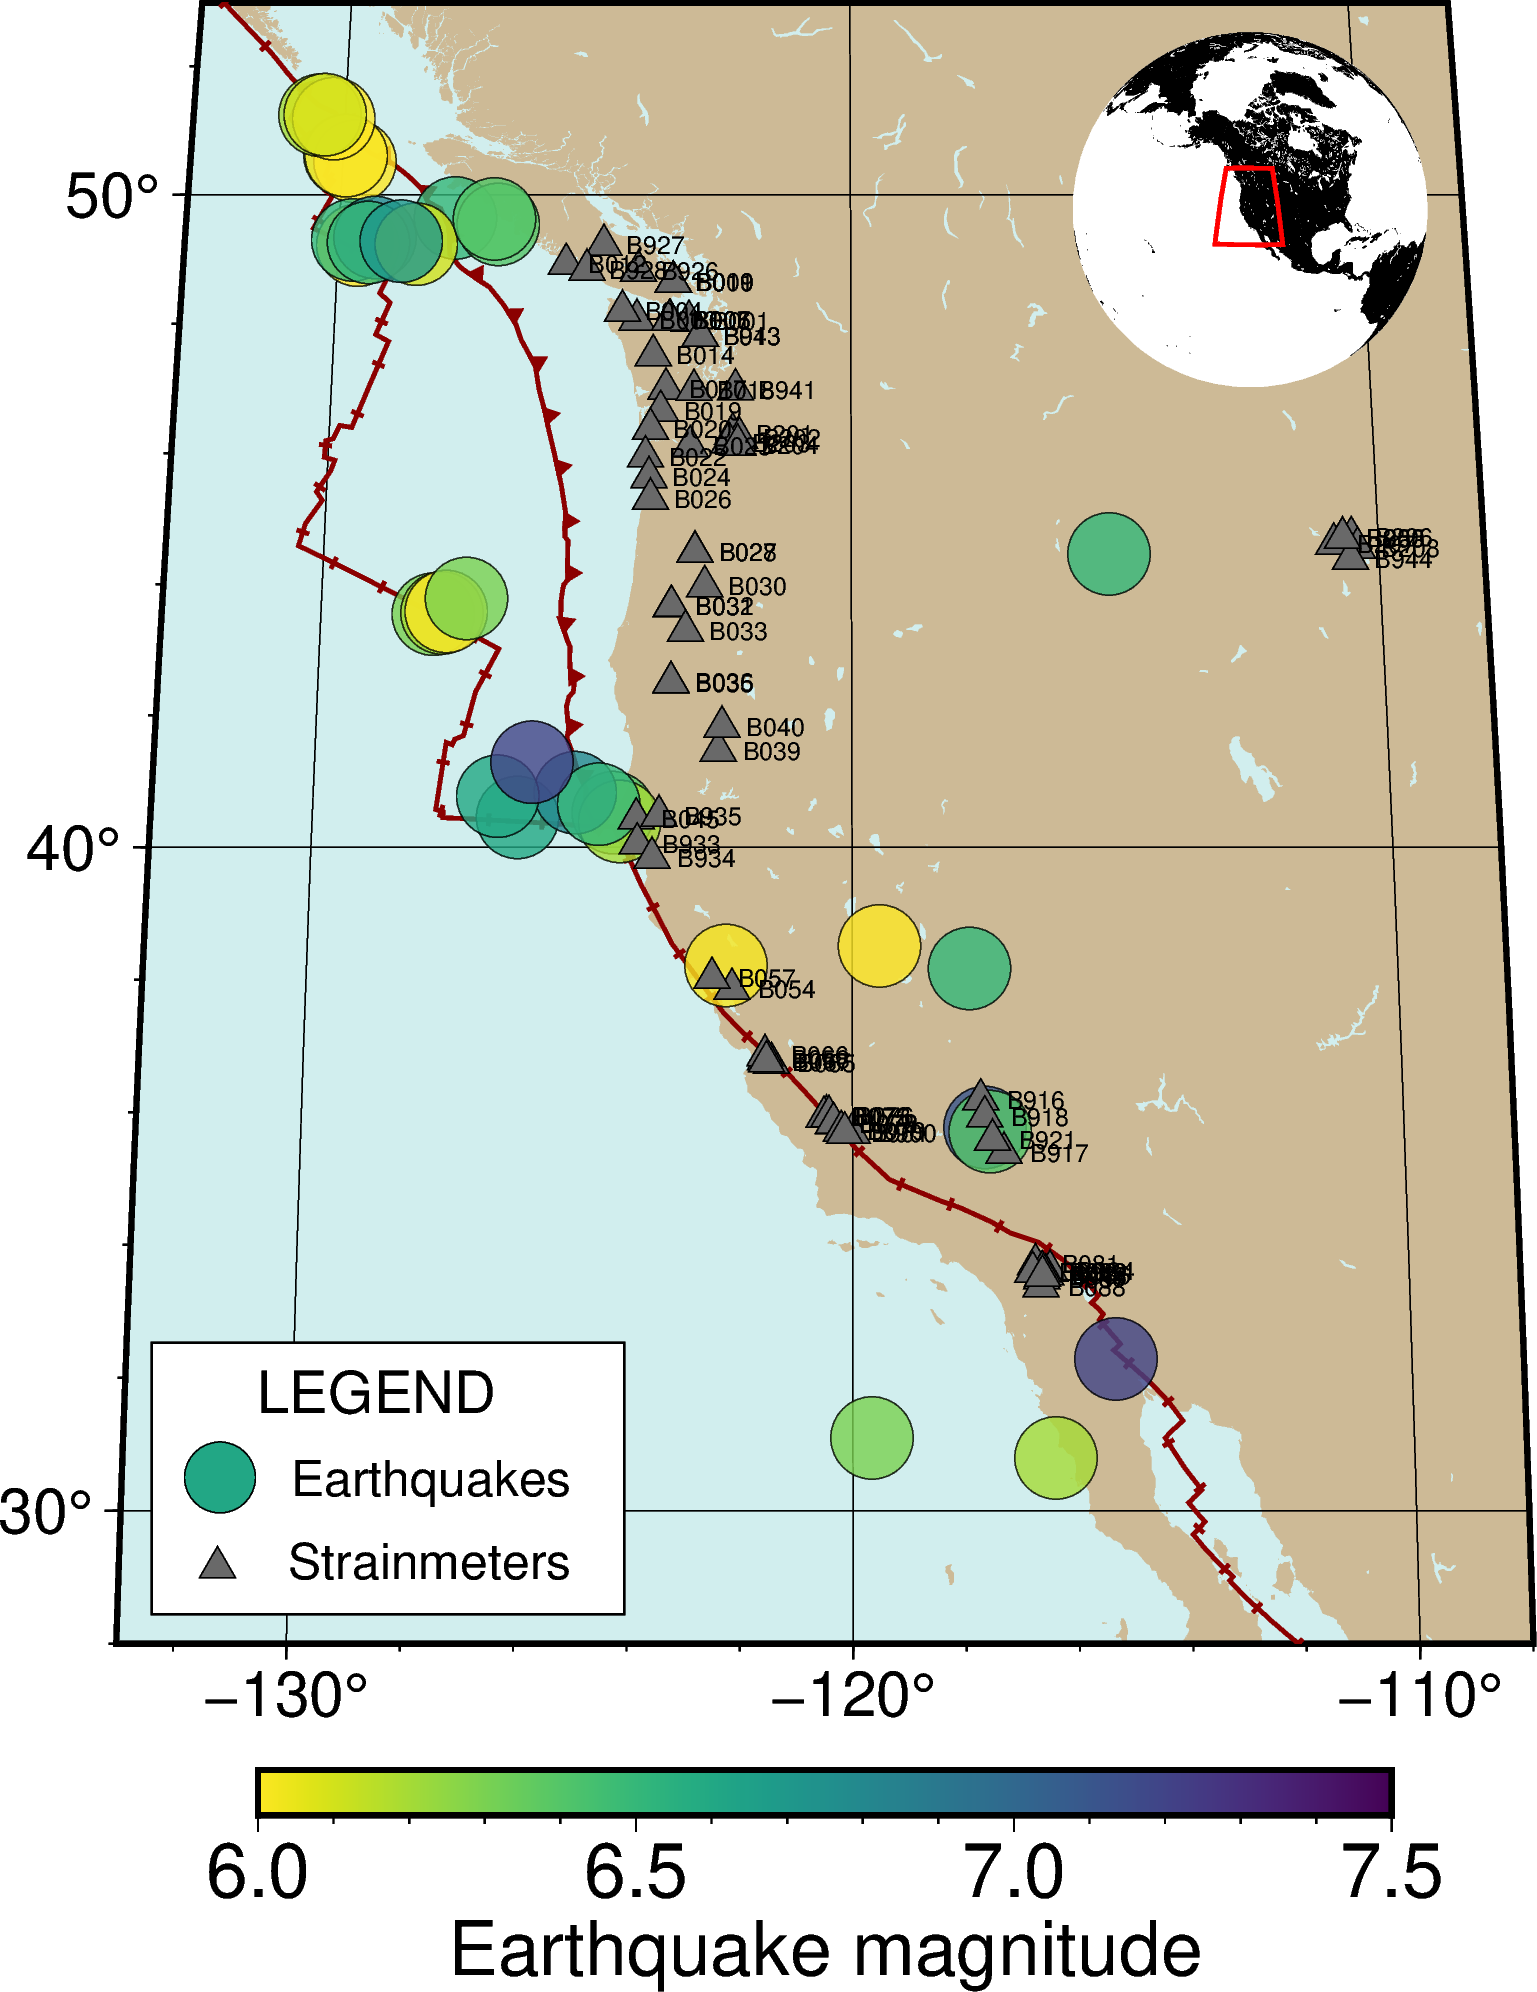

In [5]:
# All North American earthquakes

pygmt.config(COLOR_BACKGROUND = 'white')

fig = pygmt.Figure()

region=[-133,-108,28,53]

fig.coast(region=region, projection="N12c", land="wheat3", water="lightcyan2", frame="afg")

# Add plate boundaries

fig.plot(data = '/Users/sydneydybing/StrainProject/2024/PB2002_boundaries.gmt', pen = '1p,darkred', style = 'f0.25/3p', fill = 'darkred')

# Plot earthquakes and stations

pygmt.makecpt(cmap="viridis", series=[earthquakes.mag.astype(float).min(), earthquakes.mag.astype(float).max()+0.3], reverse=True)
fig.plot(x = earthquakes.longitude.astype(float), y = earthquakes.latitude.astype(float), style="c0.7c", fill=earthquakes.mag.astype(float), cmap=True, pen="black", transparency = 20)
fig.plot(x = bsm_mda.LONG, y = bsm_mda.LAT, style = "t0.35c", fill = "dimgrey", pen = "black")
fig.text(x = bsm_mda.LONG+1, y = bsm_mda.LAT, text = bsm_mda.BNUM, font = '6p,black') 
with pygmt.config(FONT='18'):
    fig.colorbar(frame="af+lEarthquake magnitude")

# Make legend

with fig.inset(position="jBL+w4c/2.3c+o0.3c/0.25c", box="+p0.5+gwhite"):
    pass
fig.plot(x=-131.25, y=30.5, fill='#22a785', pen='black', style='c0.6c')
fig.text(text=['Earthquakes'], x=-127.5, y=30.5, font='12p,black')
fig.plot(x=-131.25, y=29.15, fill='dimgrey', pen='black', style='t0.35c')
fig.text(text=['Strainmeters'], x=-127.5, y=29.25, font='12p,black')
fig.text(text=['LEGEND'], x=-128.5, y=31.8, font='14p,black')

# Add inset map

with fig.inset(position="jTR+w3c+o0.9c/0.25c"):
    fig.coast(projection="G-120/40/3c", land="black", water="white")
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,red")

# Show or save 

fig.show();

# fig.savefig('/Users/sydneydybing/StrainProject/2024/figures/NA_earthquake_station_map_labels.pdf');